In [102]:
import pandas as pd
import numpy as np
from shapely.geometry import LineString

# Carica il dataset
df = pd.read_csv("data/gps-22-12-2024.csv",
    usecols=[0, 1, 2, 3, 4, 5, 6, 7],
    names=["unixtime", "latitudine", "longitudine", "altitudine", "boh1", "boh2", "precisione_orizzontale", "precisione_verticale"])

# Funzione per trovare intersezioni con vincolo temporale (5 minuti)
def find_intersecting_points(df, max_time_diff=60*5):
    points_to_remove = []  ## Lista per i punti da rimuovere
    segments = [] ## i segmenti che uniscono 2 punti

    ## crea segmenti
    for i in range(len(df) - 1):
        ## un segmento è fatto dal punto d'inizio e il punto di fine con relativi timestamp
        point1 = (df.loc[i, "longitudine"], df.loc[i, "latitudine"])
        point2 = (df.loc[i + 1, "longitudine"], df.loc[i + 1, "latitudine"])
        time1 = df.loc[i, "unixtime"]
        time2 = df.loc[i + 1, "unixtime"]

        ## il segmento diventa un tipo LineString
        segment = LineString([point1, point2])

        ## aggiunge il segmento con i timestamp e gli indici
        segments.append((   segment, 
                            time1, 
                            time2, 
                            i, 
                            i + 1))  

    ## controlla le intersezioni
    for i in range(len(segments)):
        j = i + 2   ## partiamo dal segmento successivo, 
                    ## 2 punti più in la per evitare intersezioni in un punto singolo!!!

        while j < len(segments) and abs(segments[i][2] - segments[j][1]) <= max_time_diff:  
            segment1 = segments[i][0]  ## il primo valore della tupla è un segmento
            segment2 = segments[j][0]  

            if segment1.intersects(segment2):  ## se si intersecano
                points_to_remove.append(segments[i][4])  ## elimina i punti di indice i e j
                points_to_remove.append(segments[j][3])  ## [3]: i [4]:i+1 

            j += 1  # Passa al segmento successivo

    return points_to_remove



In [107]:
# Trova i punti da rimuovere con vincolo temporale
outlier_indices = find_intersecting_points(df)

# Crea il dataset pulito
df_clean = df.drop(outlier_indices).reset_index(drop=True)

# Visualizza il risultato
print(df_clean)

          unixtime  latitudine  longitudine   altitudine   boh1      boh2  \
0     1.734854e+09   46.512215    12.951416  1313.500000   -1.0  0.066263   
1     1.734854e+09   46.512213    12.951413  1313.800049   -1.0  0.096455   
2     1.734856e+09   46.511890    12.951192  1317.099976  206.6  0.473820   
3     1.734856e+09   46.511878    12.951062  1317.400024  288.1  0.103190   
4     1.734857e+09   46.511974    12.950985  1317.800049   -1.0  0.086798   
...            ...         ...          ...          ...    ...       ...   
3330  1.734881e+09   46.513191    12.952664  1303.341145  162.0  4.345658   
3331  1.734881e+09   46.513069    12.952648  1303.421845  161.7  6.999518   
3332  1.734881e+09   46.512937    12.952691  1303.545340  161.1  7.942556   
3333  1.734881e+09   46.512798    12.952738  1303.477654  163.0  7.960455   
3334  1.734881e+09   46.512798    12.952738  1303.477654  163.0  7.960455   

      precisione_orizzontale  precisione_verticale  
0                     

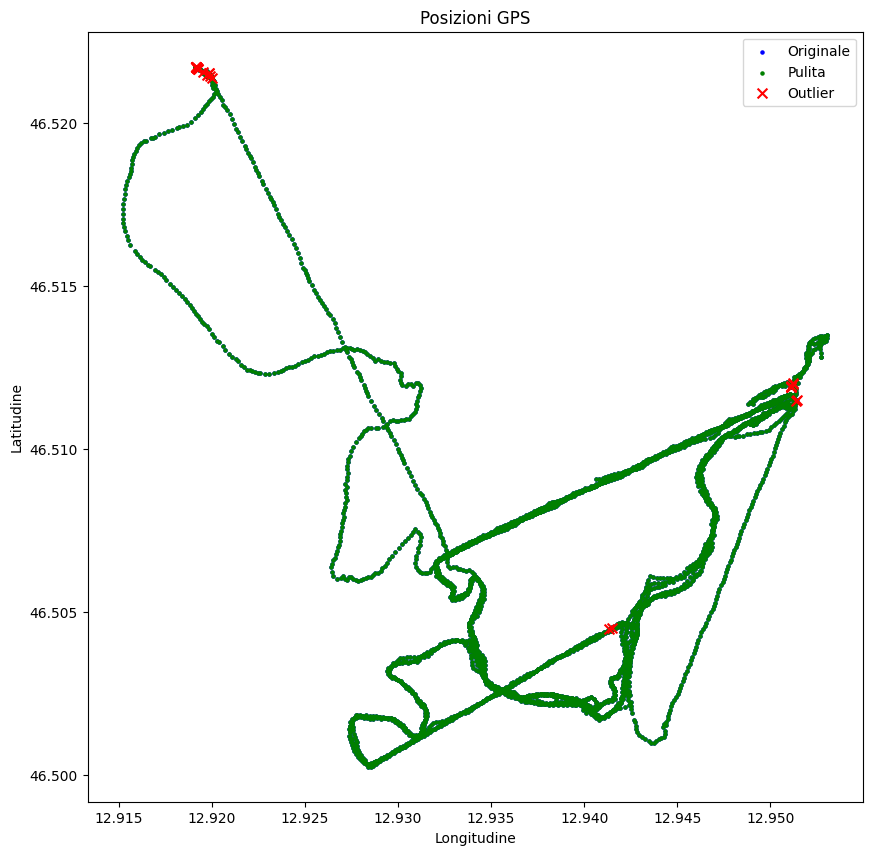

          unixtime  latitudine  longitudine   altitudine   boh1      boh2  \
0     1.734854e+09   46.512215    12.951416  1313.500000   -1.0  0.066263   
1     1.734854e+09   46.512213    12.951413  1313.800049   -1.0  0.096455   
2     1.734856e+09   46.511890    12.951192  1317.099976  206.6  0.473820   
3     1.734856e+09   46.511878    12.951062  1317.400024  288.1  0.103190   
4     1.734857e+09   46.511974    12.950985  1317.800049   -1.0  0.086798   
...            ...         ...          ...          ...    ...       ...   
3330  1.734881e+09   46.513191    12.952664  1303.341145  162.0  4.345658   
3331  1.734881e+09   46.513069    12.952648  1303.421845  161.7  6.999518   
3332  1.734881e+09   46.512937    12.952691  1303.545340  161.1  7.942556   
3333  1.734881e+09   46.512798    12.952738  1303.477654  163.0  7.960455   
3334  1.734881e+09   46.512798    12.952738  1303.477654  163.0  7.960455   

      precisione_orizzontale  precisione_verticale  
0                     

In [104]:

# --- PLOTTING ---
plt.figure(figsize=(10, 10))

# Scatter della traiettoria originale
plt.scatter(df['longitudine'], df['latitudine'], color='blue', marker='o', s=5, label='Originale')

# Scatter della traiettoria pulita
plt.scatter(df_clean['longitudine'], df_clean['latitudine'], color='green', marker='o', s=5, label='Pulita')

# Evidenzia gli outlier in rosso
for idx in outlier_indices:
    plt.scatter(df.loc[idx, 'longitudine'], df.loc[idx, 'latitudine'], color='red', marker='x', s=50, label='Outlier' if idx == outlier_indices[0] else "")

plt.title("Posizioni GPS")
plt.xlabel("Longitudine")
plt.ylabel("Latitudine")
plt.legend()
plt.show()

# Mostra il nuovo dataset pulito
print(df_clean)